## Split train dataset into train and validation set

In [1]:
import pandas as pd
import numpy as np

import cv2
import matplotlib.pyplot as plt
from scipy.io import loadmat

import glob

import shutil

from keras.preprocessing import image
from keras.models import Sequential, Model 
from keras.layers import Input, Dropout, Flatten, Dense, Conv2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.applications import VGG16
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam, SGD

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
img_label_list = pd.read_csv('./data/train/digitStruct.csv')
img_list = np.random.permutation(list(img_label_list.groupby('FileName').groups.keys()))
extra_img_label_list = pd.read_csv('./data/extra/digitStruct.csv')
extra_img_list = np.random.permutation(list(extra_img_label_list.groupby('FileName').groups.keys()))
test_img_label_list = pd.read_csv('./data/test/digitStruct.csv')

Do 80:20 split of train set into train and validation set

In [3]:
valid_img_list = img_list[:int(round(0.2 * len (img_list)))]
train_img_list = img_list[int(round(0.2 * len (img_list))):]

In [4]:
valid_img_label_list = img_label_list[img_label_list['FileName'].isin(valid_img_list)]
train_img_label_list = img_label_list[img_label_list['FileName'].isin(train_img_list)]

In [5]:
print(len(img_list))
print(len(img_label_list))
print(len(train_img_list))
print(len(train_img_label_list))
print(len(valid_img_list))
print(len(valid_img_label_list))
print(len(extra_img_list))
print(len(extra_img_label_list))
print(len(test_img_label_list))

33402
73257
26722
58620
6680
14637
202353
531131
26032


#### crop train and valid digits and put in cropped folders

In [ ]:
# put training images in sub folders
for index, img_label in train_img_label_list.iterrows():
#     print(img_label['FileName'])
    if ((img_label['Top'] < 0) or (img_label['Left'] < 0)):
        continue
        
    img = cv2.imread('./data/train/' + img_label['FileName'])       
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# #     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    digit_img = img[img_label['Top']:img_label['Top'] + img_label['Height'], 
                    img_label['Left']: img_label['Left'] + img_label['Width']]
#     diff = img_label['Height'] - img_label['Width']
#     if (diff >= 0):    
#         digit_img = cv2.copyMakeBorder(digit_img,0,0,0,diff,cv2.BORDER_CONSTANT)
#     else:
#         digit_img = cv2.copyMakeBorder(digit_img,0,-diff,0,0,cv2.BORDER_CONSTANT)     
        
    digit_img = cv2.resize(digit_img,(48,48))    
    label = str(img_label['DigitLabel'])
    fileName = img_label['FileName']
    path = './data/train-cropped/' + label + '/' + str(index) + '-' + label + '-' + fileName
    cv2.imwrite(path, digit_img)    

In [ ]:
# put validation images in folder
for index, img_label in valid_img_label_list.iterrows():
    if ((img_label['Top'] < 0) or (img_label['Left'] < 0)):
        continue
    
    img = cv2.imread('./data/train/' + img_label['FileName']) 
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.show()
#     break
    digit_img = img[img_label['Top']:img_label['Top'] + img_label['Height'], 
                    img_label['Left']: img_label['Left'] + img_label['Width']]
#     diff = img_label['Height'] - img_label['Width']
#     if (diff >= 0):    
#         digit_img = cv2.copyMakeBorder(digit_img,0,0,0,diff,cv2.BORDER_CONSTANT)
#     else:
#         digit_img = cv2.copyMakeBorder(digit_img,0,-diff,0,0,cv2.BORDER_CONSTANT)            
    digit_img = cv2.resize(digit_img,(48,48))    
    label = str(img_label['DigitLabel'])
    fileName = img_label['FileName']
    path = './data/valid-cropped/' + label + '/' + str(index) + '-' + label + '-' + fileName
    cv2.imwrite(path, digit_img)    

#### Setup extra-cropped folder

In [ ]:
# put training images in sub folders
for index, img_label in extra_img_label_list.iterrows():    
#     print(img_label['FileName'])
    if ((img_label['Top'] < 0) or (img_label['Left'] < 0) or (img_label['Height'] < 0) or (img_label['Width'] < 0)):
        continue
        
    img = cv2.imread('./data/extra/' + img_label['FileName'])
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    digit_img = img[img_label['Top']:img_label['Top'] + img_label['Height'], 
                    img_label['Left']: img_label['Left'] + img_label['Width']]
#     diff = img_label['Height'] - img_label['Width']
#     if (diff >= 0):    
#         digit_img = cv2.copyMakeBorder(digit_img,0,0,0,diff,cv2.BORDER_CONSTANT)
#     else:
#         digit_img = cv2.copyMakeBorder(digit_img,0,-diff,0,0,cv2.BORDER_CONSTANT)            
        
#     plt.imshow(cv2.cvtColor(digit_img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()    
    try:
        digit_img = cv2.resize(digit_img,(48,48))    
            
    except:
        print(img_label)
    
    label = str(img_label['DigitLabel'])
    fileName = img_label['FileName']
    path = './data/extra-cropped/' + label + '/' + str(index) + '-' + label + '-' + fileName
    cv2.imwrite(path, digit_img)    

#### Put extra images into training and validation folder

In [ ]:
# put extra digit images in training folder
total_train_images = 10000
total_valid_images = 2500

labels = ['1','2','3','4','5','6','7','8','9','10']
for label in labels:
    train_img_paths = np.random.permutation(glob.glob('./data/train-cropped/'+ label + '/*'))
    valid_img_paths = np.random.permutation(glob.glob('./data/valid-cropped/'+ label + '/*'))
    diff_train = total_train_images - len(train_img_paths)
    diff_valid = total_valid_images - len(valid_img_paths)
    
    extra_img_paths = np.random.permutation(glob.glob('./data/extra-cropped/'+ label + '/*'))
    if (diff_train > 0):        
        for img_path in extra_img_paths[:diff_train]:        
            shutil.copy(img_path, './data/train-cropped/' + label + '/')
            
    if (diff_valid > 0):
        for img_path in extra_img_paths[diff_train:diff_train + diff_valid]:        
            shutil.copy(img_path, './data/valid-cropped/' + label + '/')        

#### set up train_32x32 and valid_32x32

In [6]:
# put digits in train_32x32 and valid_32x32 folder
data_32 = loadmat('data/train_32x32.mat')
x_data_32 = data_32['X']
y_data_32 = data_32['y']

In [7]:
x_data_32 = x_data_32[np.newaxis,...]
x_data_32 = np.swapaxes(x_data_32,0,4).squeeze()

In [8]:
print(x_data_32.shape)
print(y_data_32.shape)

(73257, 32, 32, 3)
(73257, 1)


In [9]:
indexes = np.random.permutation(x_data_32.shape[0])
# train_indexes = indexes
train_indexes = indexes[:round(0.8 * len(indexes))]
valid_indexes = indexes[round(0.8 * len(indexes)):]   

In [10]:
for index in train_indexes:
    digit_img = x_data_32[index,:,:,:]    
    label = y_data_32[index,0]
    if (label == 10):
        label = 0
    label = str(label)    
    index = str(index)
    path = './data/train_32x32/' + label + '/' + label + '-' + index + '.png'
    cv2.imwrite(path, digit_img)

In [11]:
for index in valid_indexes:
    digit_img = x_data_32[index,:,:,:]
    label = y_data_32[index,0]
    if (label == 10):
        label = 0
    label = str(label)    
    index = str(index)
    path = './data/valid_32x32/' + label + '/' + label + '-' + index + '.png'
    cv2.imwrite(path, digit_img)

In [ ]:
# test_32 = loadmat('data/test_32x32.mat')
# x_test_32 = test_32['X']
# y_test_32 = test_32['y']

In [ ]:
# x_test_32 = x_test_32[np.newaxis,...]
# x_test_32 = np.swapaxes(x_test_32,0,4).squeeze()

In [ ]:
# indexes = np.random.permutation(x_test_32.shape[0])
# valid_indexes = indexes
# # train_indexes = indexes[:round(0.8 * len(indexes))]
# # valid_indexes = indexes[round(0.8 * len(indexes)):]   

In [ ]:
# print(x_test_32.shape)
# print(y_test_32.shape)

In [ ]:
# for index in valid_indexes:
#     digit_img = x_test_32[index,:,:,:]    
#     label = str(y_test_32[index,0])
#     index = str(index)
#     path = './data/valid_32x32/' + label + '/' + label + '-' + index + '.png'
#     cv2.imwrite(path, digit_img)

In [ ]:
# print(x_data_32.shape[3])
# indexes = np.random.permutation(x_data_32.shape[3])
# train_indexes = indexes[:round(0.8 * len(indexes))]
# valid_indexes = indexes[round(0.8 * len(indexes)):]   

In [ ]:
# for index in train_indexes:
#     digit_img = x_data_32[:,:,:,index]
#     label = str(y_data_32[index,0])
#     index = str(index)
#     path = './data/train_32x32/' + label + '/' + label + '-' + index + '.png'
#     cv2.imwrite(path, digit_img)

In [ ]:
# for index in valid_indexes:
#     digit_img = x_data_32[:,:,:,index]
#     label = str(y_data_32[index,0])
#     index = str(index)
#     path = './data/valid_32x32/' + label + '/' + label + '-' + index + '.png'
#     cv2.imwrite(path, digit_img)

#### set up test_32x32

In [12]:
# put digits in test_32x32 folder
test_32 = loadmat('data/test_32x32.mat')
x_test_32 = test_32['X']
y_test_32 = test_32['y']
print(x_test_32.shape)
print(y_test_32.shape)

(32, 32, 3, 26032)
(26032, 1)


In [13]:
x_test_32 = x_test_32[np.newaxis,...]
x_test_32 = np.swapaxes(x_test_32,0,4).squeeze()
print(x_test_32.shape)
print(y_test_32.shape)

(26032, 32, 32, 3)
(26032, 1)


In [14]:
for index,label in enumerate(y_test_32):
    digit_img = x_test_32[index,:,:,:]    
    label = y_test_32[index,0]
    if (label == 10):
        label = 0
    label = str(label)    
    index = str(index)
    path = './data/test_32x32/' + label + '/' + label + '-' + index + '.png'
    cv2.imwrite(path, digit_img)

In [ ]:
# for index,label in enumerate(y_test_32):
#     digit_img = x_test_32[:,:,:,index]
# #     print(digit_img.shape)
# #     print(label)
# #     plt.imshow(digit_img)
# #     plt.axis('off')
# #     plt.show()
#     label = str(label[0])
#     index = str(index)
#     path = './data/test_32x32/' + label + '-' + index + '.png'
#     cv2.imwrite(path, digit_img)
        

#### set up train ,valid and test non-digit_32x32 folders

In [15]:
# put non-digits in train non-digit_32x32 folder
counter = 0
file = ''
for index, img_label in train_img_label_list.iterrows(): 
    # Decide number of rows to extract
    if (counter > 8000):
        break        
               
    fileName = img_label['FileName']                    
    if (file != fileName):                
        if (file != ''):            
            non_digit_img = cv2.resize(img, (32,32))
            label = str(img_label['DigitLabel'])    
            path = './data/train_32x32/99/' + file
            cv2.imwrite(path, non_digit_img)  
            counter = counter + 1 
            
        img = cv2.imread('./data/train/' + img_label['FileName'])    
        file = fileName
    
    img[img_label['Top']:img_label['Top'] + img_label['Height'], 
        img_label['Left']: img_label['Left'] + img_label['Width']] = img[img_label['Top'], img_label['Left']]    

In [16]:
print(counter)

8001


In [17]:
# put non-digits in valid non-digit_32x32 folder
counter = 0
file = ''
for index, img_label in valid_img_label_list.iterrows(): 
    # Decide number of rows to extract
    if (counter > 2000):
        break        
               
    fileName = img_label['FileName']                    
    if (file != fileName):                
        if (file != ''):            
            non_digit_img = cv2.resize(img, (32,32))
            label = str(img_label['DigitLabel'])    
            path = './data/valid_32x32/99/' + file
            cv2.imwrite(path, non_digit_img)  
            counter = counter + 1 
            
        img = cv2.imread('./data/train/' + img_label['FileName'])    
        file = fileName
    
    img[img_label['Top']:img_label['Top'] + img_label['Height'], 
        img_label['Left']: img_label['Left'] + img_label['Width']] = img[img_label['Top'], img_label['Left']]    

In [18]:
counter

2001

In [19]:
# put non-digits in test non-digit_32x32 folder
counter = 0
file = ''
for index, img_label in test_img_label_list.iterrows(): 
    # Decide number of rows to extract
#     if (counter > 2000):
#         break        
               
    fileName = img_label['FileName']                    
    if (file != fileName):                
        if (file != ''):            
            non_digit_img = cv2.resize(img, (32,32))            
            path = './data/test_32x32/99/' + file
            cv2.imwrite(path, non_digit_img)  
            counter = counter + 1 
            
        img = cv2.imread('./data/test/' + img_label['FileName'])    
        file = fileName
    
    img[img_label['Top']:img_label['Top'] + img_label['Height'], 
        img_label['Left']: img_label['Left'] + img_label['Width']] = img[img_label['Top'], img_label['Left']]

In [20]:
counter

13067

Label:  0
./data/train_32x32/0/0-25903.png


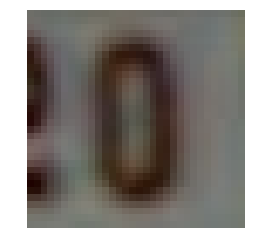

./data/train_32x32/0/0-53479.png


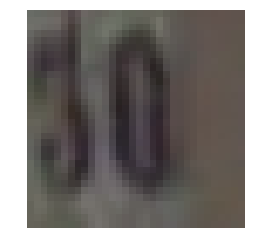

./data/train_32x32/0/0-30094.png


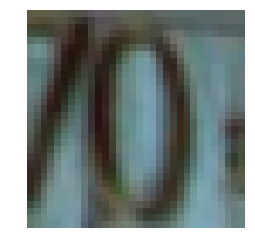

./data/train_32x32/0/0-62234.png


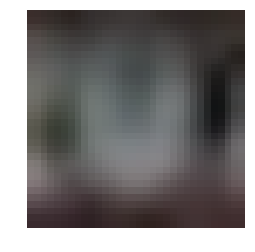

./data/train_32x32/0/0-39839.png


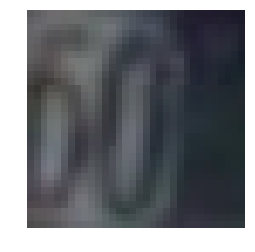

Label:  1
./data/train_32x32/1/1-446.png


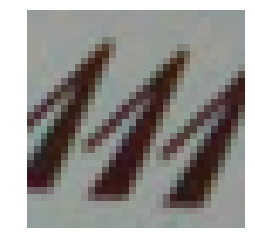

./data/train_32x32/1/1-26202.png


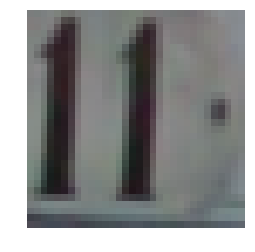

./data/train_32x32/1/1-23215.png


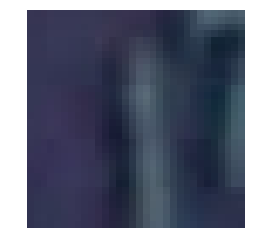

./data/train_32x32/1/1-18326.png


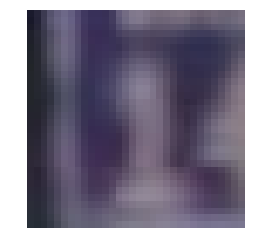

./data/train_32x32/1/1-55634.png


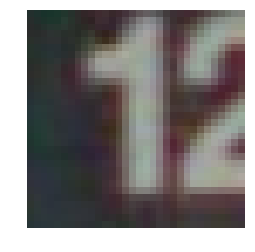

Label:  2
./data/train_32x32/2/2-9834.png


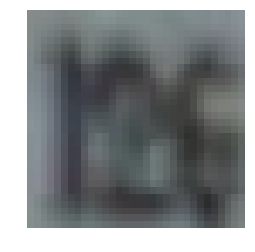

./data/train_32x32/2/2-60207.png


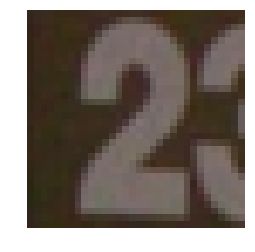

./data/train_32x32/2/2-23208.png


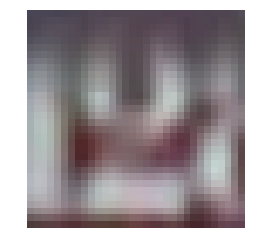

./data/train_32x32/2/2-21751.png


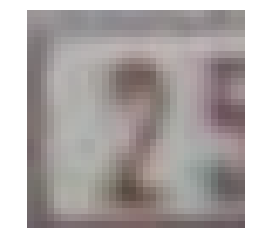

./data/train_32x32/2/2-12821.png


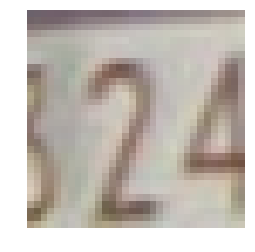

Label:  3
./data/train_32x32/3/3-71663.png


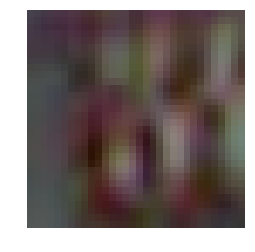

./data/train_32x32/3/3-33584.png


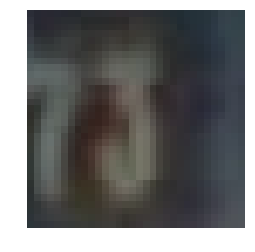

./data/train_32x32/3/3-32049.png


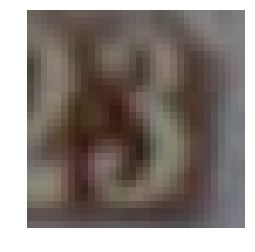

./data/train_32x32/3/3-11912.png


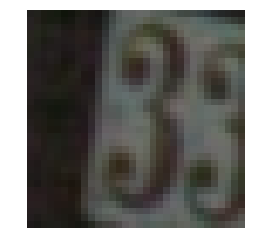

./data/train_32x32/3/3-48496.png


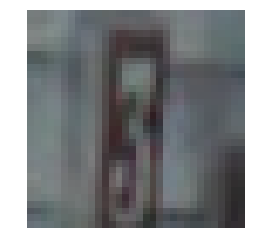

Label:  4
./data/train_32x32/4/4-1522.png


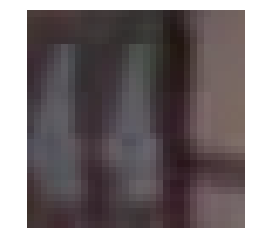

./data/train_32x32/4/4-47255.png


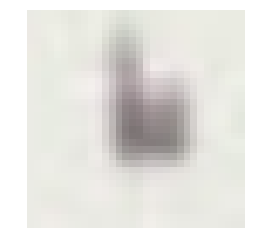

./data/train_32x32/4/4-52904.png


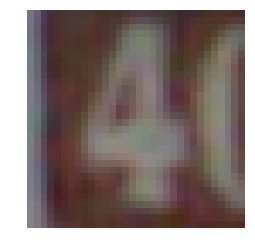

./data/train_32x32/4/4-54325.png


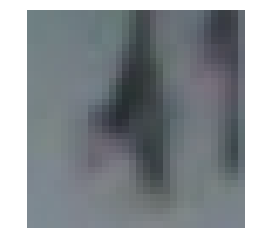

./data/train_32x32/4/4-55345.png


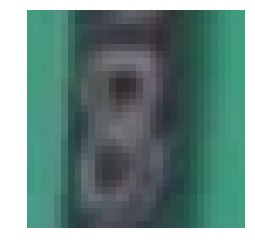

Label:  5
./data/train_32x32/5/5-44234.png


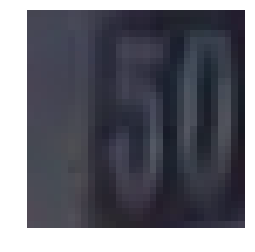

./data/train_32x32/5/5-11791.png


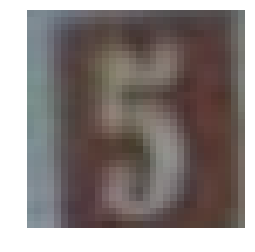

./data/train_32x32/5/5-67183.png


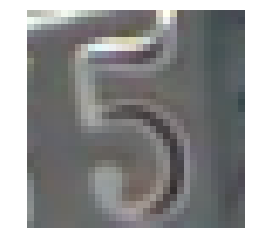

./data/train_32x32/5/5-68356.png


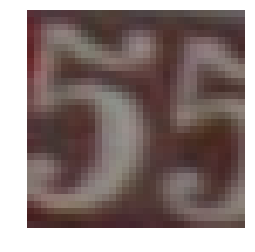

./data/train_32x32/5/5-874.png


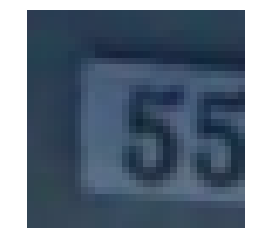

Label:  6
./data/train_32x32/6/6-47103.png


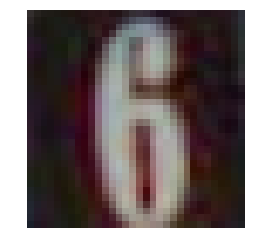

./data/train_32x32/6/6-8734.png


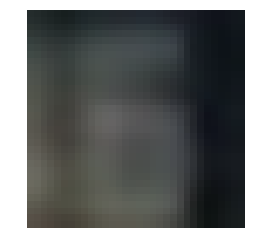

./data/train_32x32/6/6-69104.png


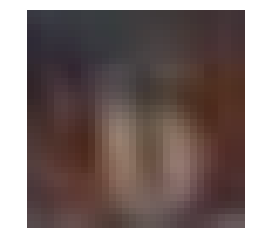

./data/train_32x32/6/6-56491.png


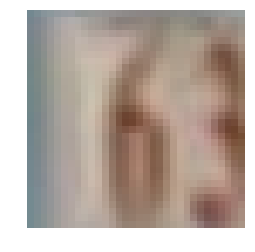

./data/train_32x32/6/6-25153.png


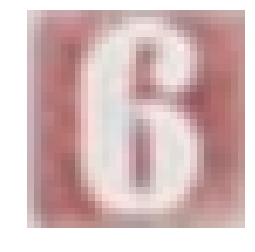

Label:  7
./data/train_32x32/7/7-4610.png


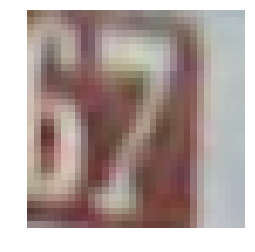

./data/train_32x32/7/7-60594.png


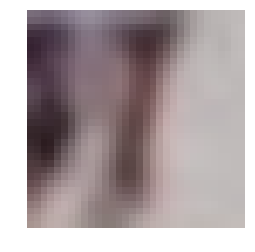

./data/train_32x32/7/7-38085.png


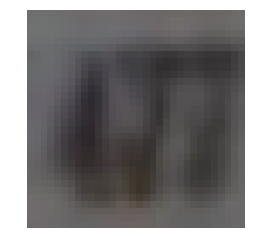

./data/train_32x32/7/7-60861.png


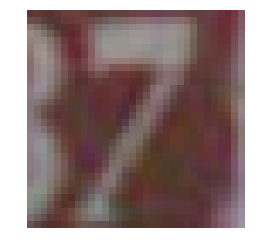

./data/train_32x32/7/7-17035.png


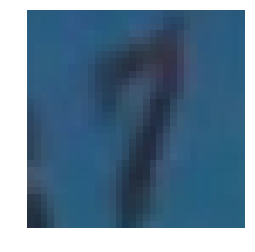

Label:  8
./data/train_32x32/8/8-48449.png


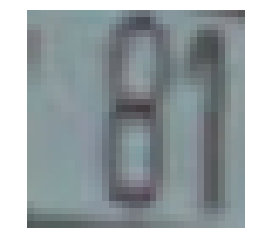

./data/train_32x32/8/8-60647.png


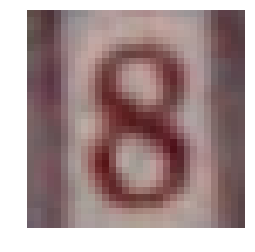

./data/train_32x32/8/8-16064.png


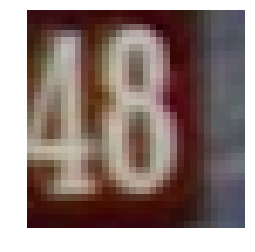

./data/train_32x32/8/8-21359.png


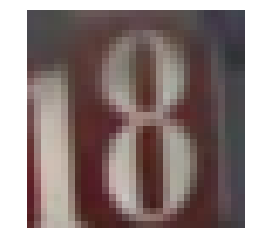

./data/train_32x32/8/8-38999.png


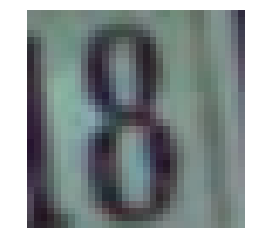

Label:  9
./data/train_32x32/9/9-35967.png


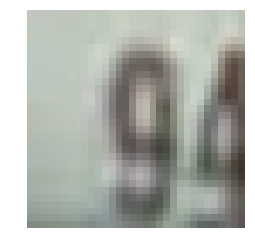

./data/train_32x32/9/9-61402.png


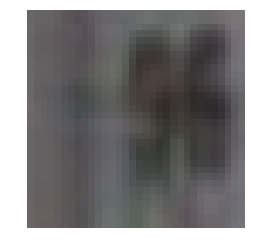

./data/train_32x32/9/9-7663.png


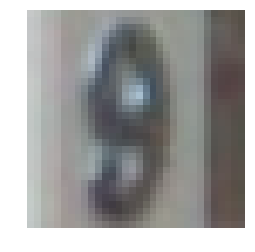

./data/train_32x32/9/9-12421.png


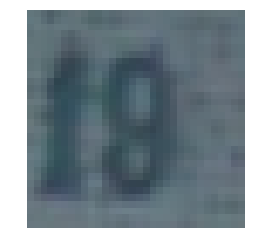

./data/train_32x32/9/9-36217.png


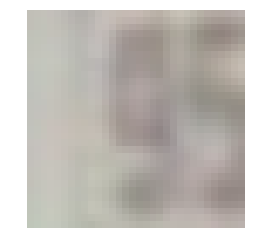

Label:  99
./data/train_32x32/99/3177.png


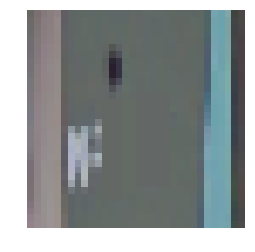

./data/train_32x32/99/6720.png


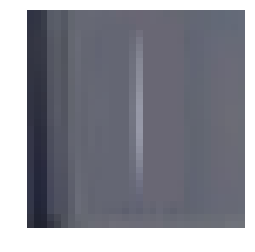

./data/train_32x32/99/5358.png


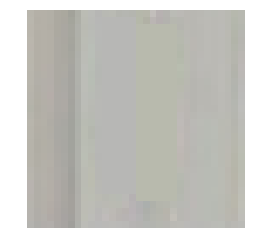

./data/train_32x32/99/3844.png


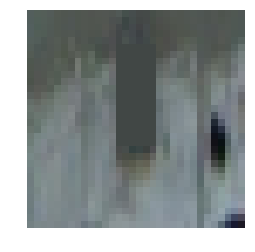

./data/train_32x32/99/6755.png


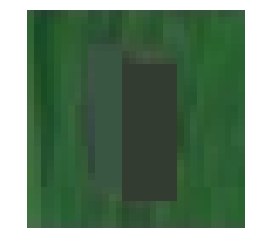

In [25]:
# display 5 images per class in train_32x32 and valid_32x32 folder
labels = ['0','1','2','3','4','5','6','7','8','9','99']
for label in labels:
    print('Label: ',label)
    img_paths = np.array(glob.glob('./data/train_32x32/' + label + '/*'))
    for img_path in img_paths[:5]:
        print(img_path)
        img = cv2.imread(img_path)    
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()        

Label:  0
./data/valid_32x32/0/0-5190.png


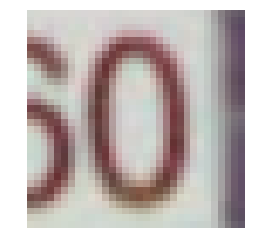

./data/valid_32x32/0/0-62059.png


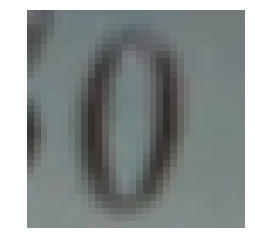

./data/valid_32x32/0/0-63228.png


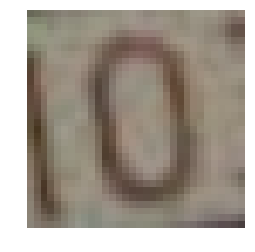

./data/valid_32x32/0/0-2959.png


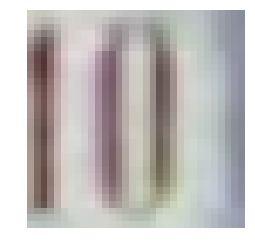

./data/valid_32x32/0/0-17117.png


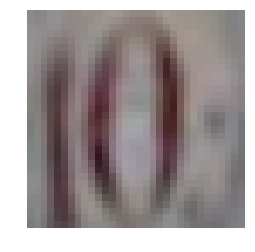

Label:  1
./data/valid_32x32/1/1-2053.png


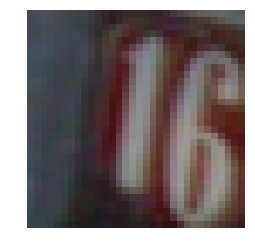

./data/valid_32x32/1/1-56473.png


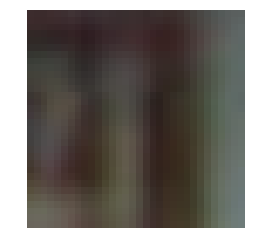

./data/valid_32x32/1/1-28554.png


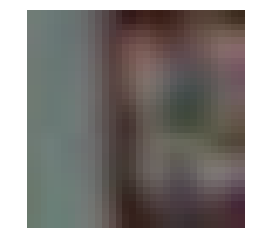

./data/valid_32x32/1/1-56528.png


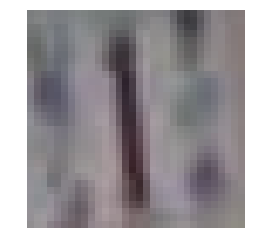

./data/valid_32x32/1/1-44523.png


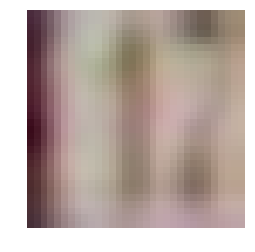

Label:  2
./data/valid_32x32/2/2-50216.png


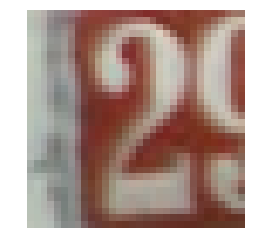

./data/valid_32x32/2/2-1533.png


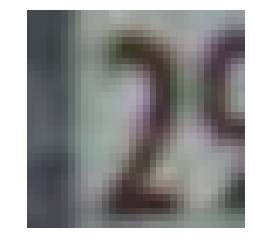

./data/valid_32x32/2/2-31637.png


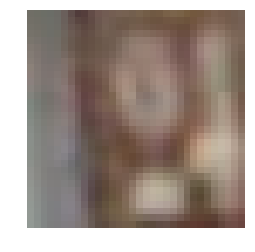

./data/valid_32x32/2/2-13199.png


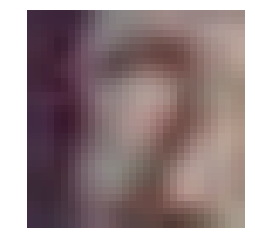

./data/valid_32x32/2/2-17864.png


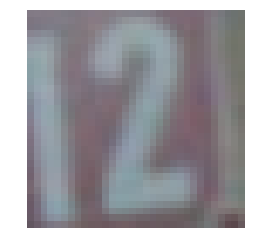

Label:  3
./data/valid_32x32/3/3-69069.png


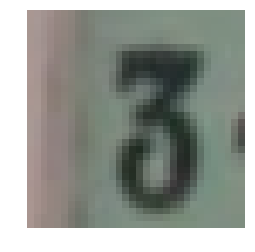

./data/valid_32x32/3/3-38636.png


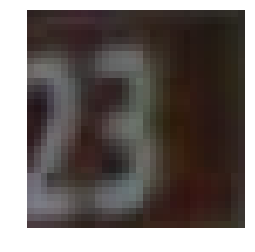

./data/valid_32x32/3/3-25515.png


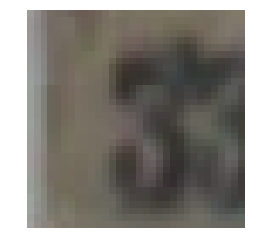

./data/valid_32x32/3/3-1701.png


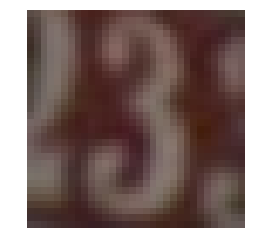

./data/valid_32x32/3/3-43611.png


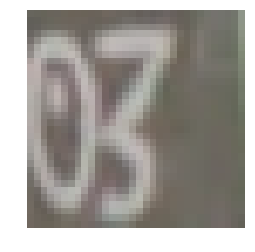

Label:  4
./data/valid_32x32/4/4-16736.png


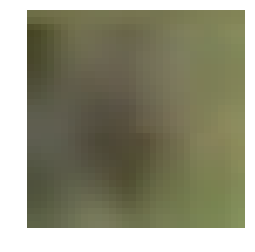

./data/valid_32x32/4/4-14148.png


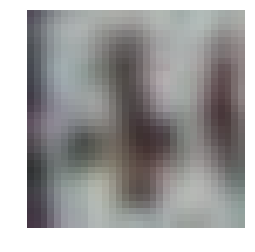

./data/valid_32x32/4/4-44826.png


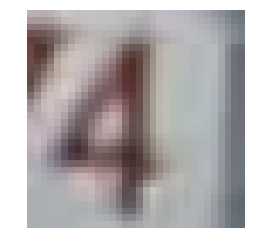

./data/valid_32x32/4/4-68831.png


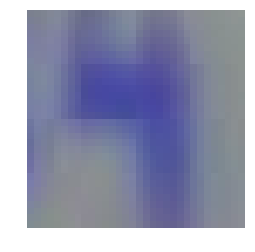

./data/valid_32x32/4/4-1833.png


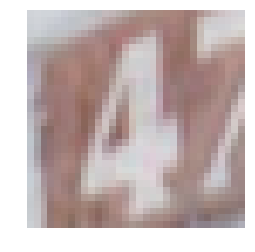

Label:  5
./data/valid_32x32/5/5-24457.png


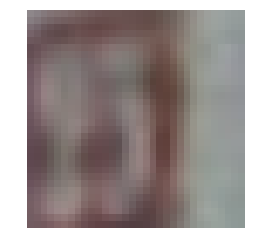

./data/valid_32x32/5/5-17743.png


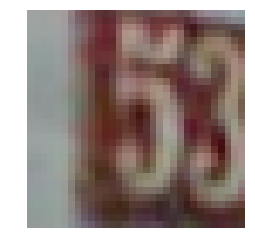

./data/valid_32x32/5/5-2161.png


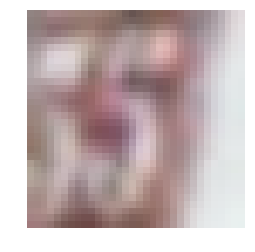

./data/valid_32x32/5/5-29399.png


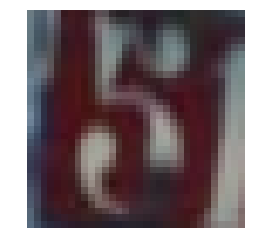

./data/valid_32x32/5/5-20962.png


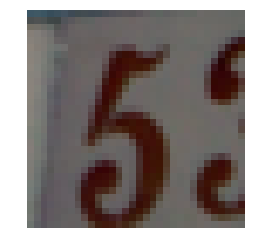

Label:  6
./data/valid_32x32/6/6-63364.png


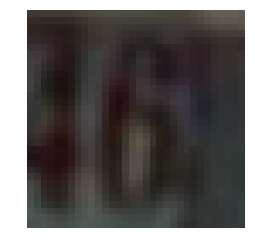

./data/valid_32x32/6/6-56192.png


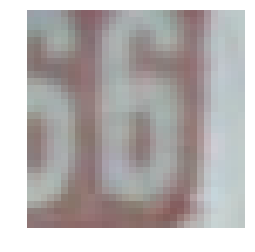

./data/valid_32x32/6/6-65064.png


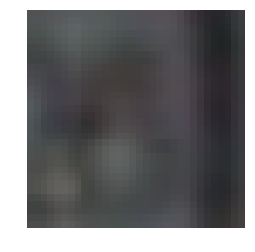

./data/valid_32x32/6/6-43467.png


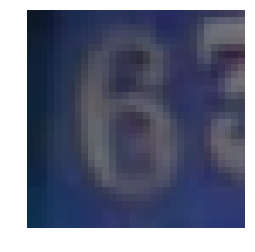

./data/valid_32x32/6/6-52755.png


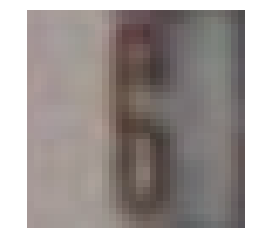

Label:  7
./data/valid_32x32/7/7-52209.png


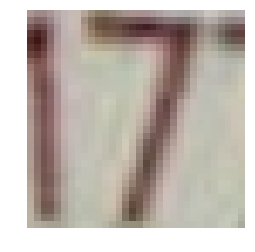

./data/valid_32x32/7/7-61090.png


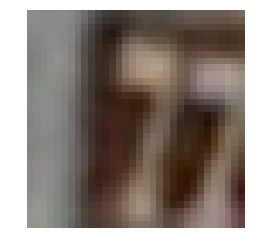

./data/valid_32x32/7/7-40056.png


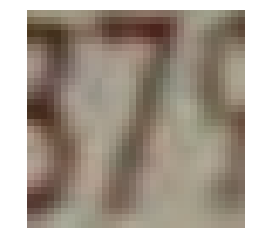

./data/valid_32x32/7/7-42673.png


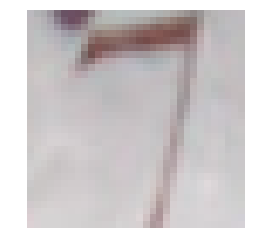

./data/valid_32x32/7/7-32440.png


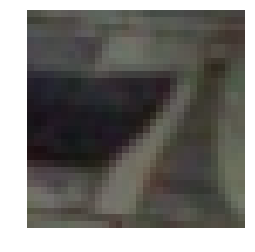

Label:  8
./data/valid_32x32/8/8-72766.png


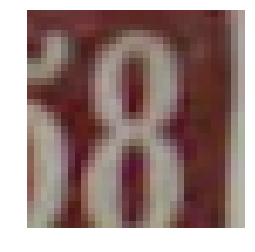

./data/valid_32x32/8/8-45779.png


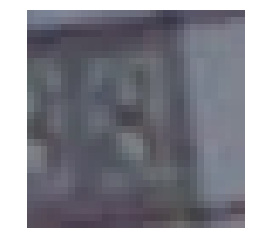

./data/valid_32x32/8/8-21875.png


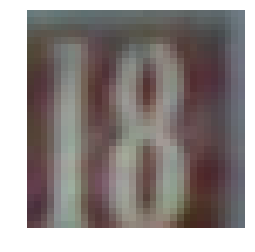

./data/valid_32x32/8/8-30898.png


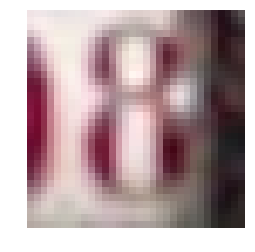

./data/valid_32x32/8/8-35572.png


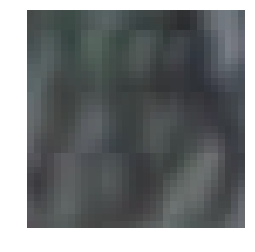

Label:  9
./data/valid_32x32/9/9-46857.png


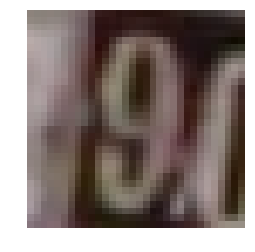

./data/valid_32x32/9/9-22601.png


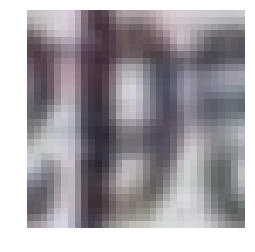

./data/valid_32x32/9/9-1323.png


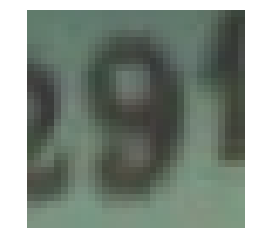

./data/valid_32x32/9/9-7269.png


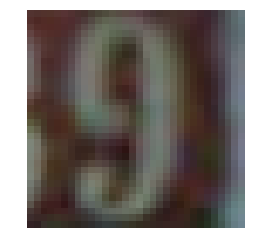

./data/valid_32x32/9/9-17216.png


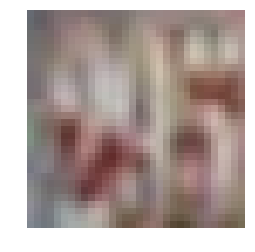

Label:  99
./data/valid_32x32/99/8470.png


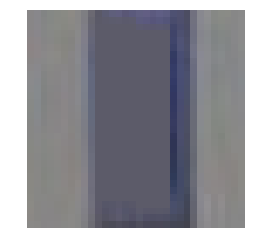

./data/valid_32x32/99/4757.png


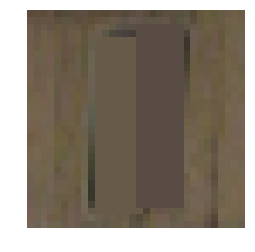

./data/valid_32x32/99/10019.png


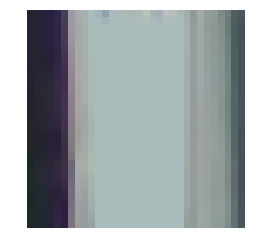

./data/valid_32x32/99/270.png


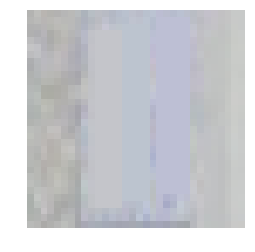

./data/valid_32x32/99/8211.png


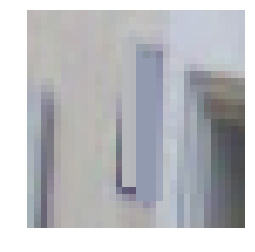

In [26]:
# display 5 images per class in train_32x32 and valid_32x32 folder
labels = ['0','1','2','3','4','5','6','7','8','9','99']
for label in labels:
    print('Label: ',label)
    img_paths = np.array(glob.glob('./data/valid_32x32/' + label + '/*'))
    for img_path in img_paths[:5]:
        print(img_path)
        img = cv2.imread(img_path)    
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()     

In [ ]:
# for index, img_label in img_label_list.iterrows():
#     print(img_label)
#     img = cv2.imread('./data/train/' + img_label['FileName'])
# #     cv2.rectangle(img, (img_label['Left'], img_label['Top']),
# #                   (img_label['Left'] + img_label['Width'], img_label['Top'] + img_label['Height']), (0,255,0),2)    
#     plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
    
#     x1 = img_label['Left']
#     y1 = img_label['Top']
#     x2 = img_label['Left'] + img_label['Width']
#     y2 = img_label['Top'] + img_label['Height']
    
#     if (img_label['Height'] > img_label['Width']):
#         x1 = img_label['Left'] - (img_label['Height'] - img_label['Width'])/2
#         x2 = img_label['Left'] + img_label['Width'] + (img_label['Height'] - img_label['Width'])/2
#         x1 = int(x1)
#         x2 = int(x2)
        
#     if(x1 < 0):            
#         print(img_label)
#         break
    
#     digit_img = img[y1:y2, x1:x2]
#     digit_img = cv2.resize(digit_img, (48,48))
#     plt.imshow(cv2.cvtColor(digit_img, cv2.COLOR_BGR2RGB))
#     plt.axis('off')
#     plt.show()
#     break

## Data Exploration and Visualisation

In [ ]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['1','2','3','4','5','6','7','8','9','10','11']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/train-cropped/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)    
print(sum(label_freq))

In [ ]:
## Data visualisation
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [ ]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['1','2','3','4','5','6','7','8','9','10','11']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/valid-cropped/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)    
print(sum(label_freq))

In [ ]:
## Data visualisation
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [ ]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['1','2','3','4','5','6','7','8','9','10','11']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/extra-cropped/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)

In [ ]:
## Data visualisation
print(sum(label_freq))
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [27]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['0','1','2','3','4','5','6','7','8','9','99']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/train_32x32/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)

[3926, 11132, 8497, 6818, 5919, 5505, 4587, 4531, 3988, 3703, 8001]


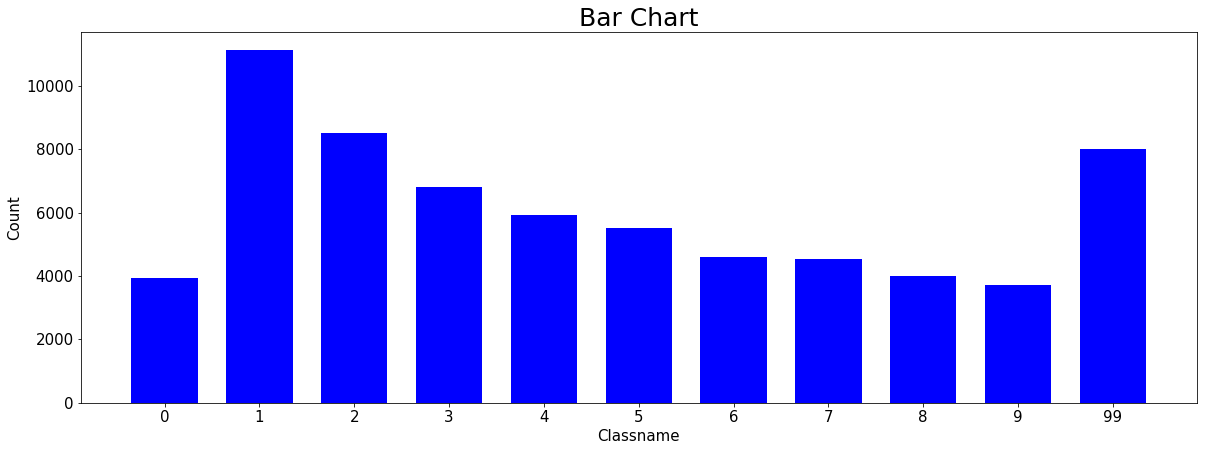

In [28]:
## Data visualisation
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [29]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['0','1','2','3','4','5','6','7','8','9','99']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/valid_32x32/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)

[1022, 2729, 2088, 1679, 1539, 1377, 1140, 1064, 1057, 956, 2001]


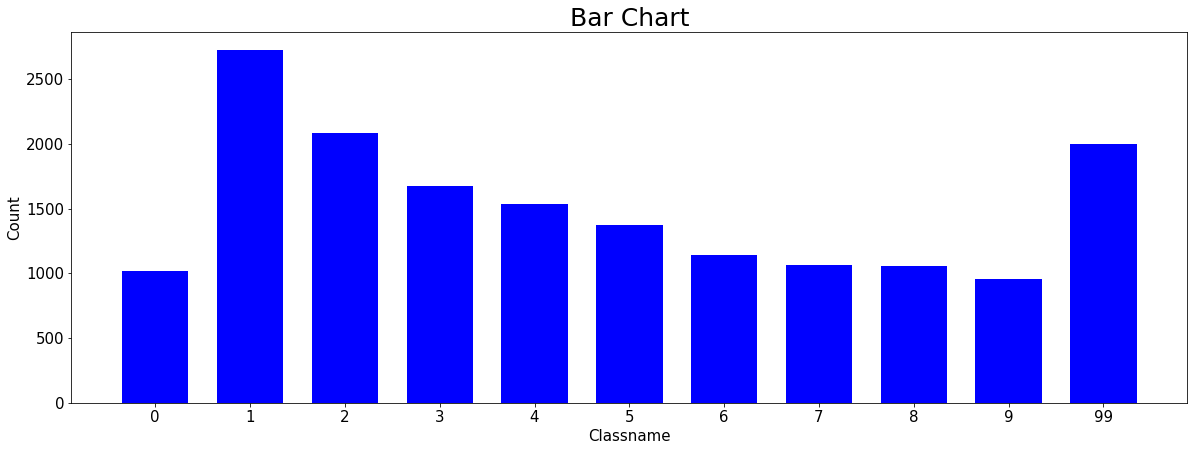

In [30]:
## Data visualisation
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [31]:
# label_freq = train_img_label_list['DigitLabel'].value_counts(sort=False)
# labels = label_freq.index.tolist()
labels = ['0','1','2','3','4','5','6','7','8','9','99']
label_freq = []
for label in labels:    
    g = np.array(glob.glob('./data/test_32x32/'+ str(label) + '/*'))
    label_freq.append(len(g))    
print(label_freq)

[1744, 5099, 4149, 2882, 2523, 2384, 1977, 2019, 1660, 1595, 13067]


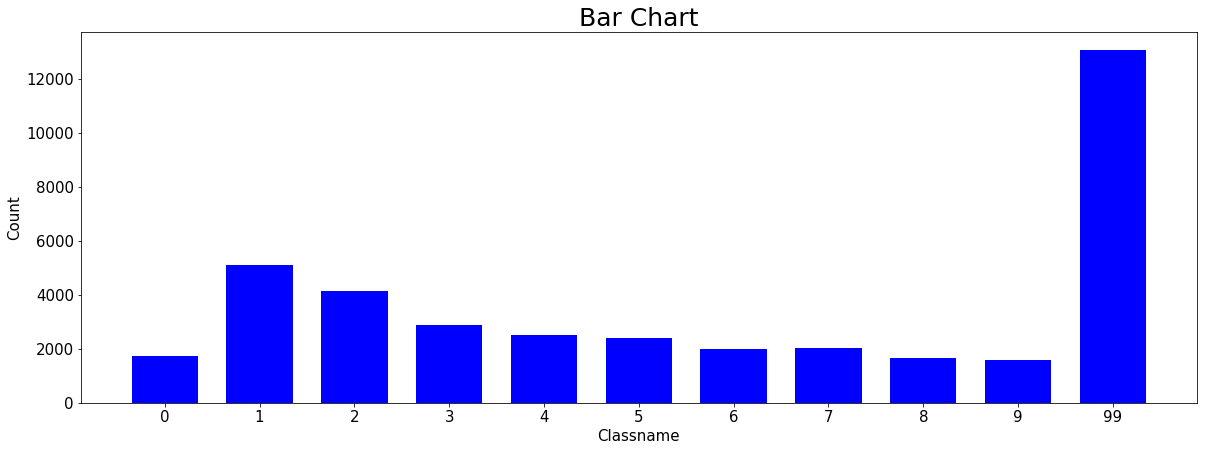

In [32]:
## Data visualisation
import matplotlib.pyplot as plt

y = np.array(label_freq)
x = range(len(y))

fig = plt.figure(figsize=(20,15))
sub_plot = fig.add_subplot(211)
plt.xticks(x, labels, size=15)
plt.yticks(size=15)

sub_plot.bar(x, y, 0.7, color="blue")

plt.title('Bar Chart',size=25)
plt.xlabel('Classname',size=15)
plt.ylabel('Count',size=15)

plt.show()